In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, beta, uniform, logistic

# Question 7.6

Sampling from the standard normal distribution $10^5$ times, calculate a Monte Carlo estimate of the value of $\int_{3}^{\infty}e^{-\frac{x^2}{2}}dx$, and estimate the standard error. Repeat the problem, sampling instead from $\mathcal{N}(3,1)$, as in (7.2).

In [36]:
def p6():
    """Complete problem 6"""

    # Sample size
    p = 5
    n = 10**p
    
    ### Method 1: sample from N(0, 1)
    def k(x):
        """k(x), the expectation of which is equal to the desired integral"""

        if 3 <= x:
            return np.exp(-x**2 / 2)/norm.pdf(x)
        else:
            return 0

    # Sample n times from N(0, 1)
    sample = norm.rvs(size=n)
    
    # Expectation E[k(x)]
    Ek = 1/n * sum([k(x) for x in sample])

    # Unbiased sample variance
    s_hatk = (1/(n-1) * sum([(k(x)-Ek)**2 for x in sample]))**(1/2)

    # Estimated standard error
    SEk = s_hatk/n**(1/2)

    print('Method 1: sample from N(0, 1)')
    print(f' E[k(x)] = {Ek}')
    print(f'      SE ~ {SEk}')
    
    ### Method 2: sample from N(3, 1)
    def g(x):
        """k(x), the expectation of which is equal to the desired integral"""

        if 3 <= x:
            return np.exp(-x**2 / 2)/norm.pdf(x, 3, 1)
        else:
            return 0

    # Sample n times from N(3, 1)
    sample = norm.rvs(3, 1, size=n)
    
    # Expectation E[g(x)]
    Eg = 1/n * sum([g(x) for x in sample])

    # Unbiased sample variance
    s_hatg = (1/(n-1) * sum([(g(x)-Eg)**2 for x in sample]))**(1/2)

    # Estimated standard error
    SEg = s_hatg/n**(1/2)

    print('Method 2: sample from N(3, 1)')
    print(f' E[g(x)] = {Eg}')
    print(f' SE      ~ {SEg}')

p6()

Method 1: sample from N(0, 1)
 E[k(x)] = 0.003233550474273988
      SE ~ 0.0002845159775294295
Method 2: sample from N(3, 1)
 E[g(x)] = 0.003357410842836899
 SE      ~ 1.9591295293134687e-05


# Question 7.7

Use importance sampling, drawing from Beta $(a,b)$ for various values of $a$ and $b$, to estimate the integral $\int_{0}^{2\pi}\frac{dx}{x^3+x+1}$. Find values of $a$, and $b$ and sample size $n$ that give a standard error less than $10^{-3}$.

Hint: The domain of Beta $(a,b)$ is [0,1], but the integral is to be evaluated over $[0,2\pi]$, so you will need to do a change of variables to be able to calculate this with samples from Beta $(a,b)$.

In [35]:
def p7():
    """Complete problem 7"""

    # Beta distribution parameters
    a, b = 1, 3

    # Sample size
    p = 4
    n = 10**p
    
    def k(x):
        """k(x), the expectation of which is equal to the desired integral"""
        
        return 1/(((2*np.pi*x)**3 + 2*np.pi*x + 1) * beta.pdf(x, a, b))

    # Sample n times from Beta(a, b)
    sample = beta.rvs(a, b, size=n)
    
    # Expectation E[k(x)]
    Ek = 1/n * sum([k(x) for x in sample])

    # Unbiased sample variance
    s_hat = (1/(n-1) * sum([(k(x)-Ek)**2 for x in sample]))**(1/2)

    # Estimated standard error
    SE = s_hat/n**(1/2)

    print(f'Size 10**{p} sample from B({a}, {b})')
    print(f' E[k(x)] = {Ek}')
    print(f' SE      ~ {SE}')

p7()

Size 10**4 sample from B(1, 3)
 E[k(x)] = 0.14403485816863862
 SE      ~ 0.0009500298401791135


# Question 7.8.iii

iii) Thus, a draw from the exponential distribution can be constructed by drawing $u$ from Uniform(0,1) and computing $- \frac{\log(1-y)}{\lambda}$. Write code to implement this, and use your code to draw $10^5$ times from Gamma(1,2). Plot a normed histogram of your results, and, on the same graph, plot the pdf of the exponential distribution for comparison.

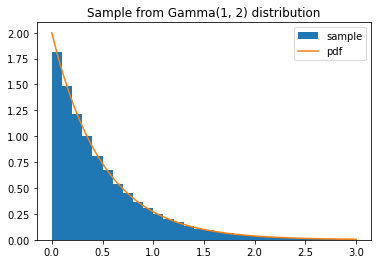

In [49]:
def p8():
    """Complete problem 8"""

    # Gamma(1, lam) parameters
    lam = 2

    # Sample size
    p = 5
    n = 10**p

    # Sample n times from Uniform(0, 1)
    sample_U = uniform.rvs(0, 1, size=n)

    # Map sample through F^{-1} to get Gamma(1, lam) sample
    sample = [-np.log(u)/lam for u in sample_U]
    
    # Plot bounds
    x1, x2 = 0, 3

    # Plot histogram of sample
    plt.hist(sample, bins=30, range=(x1, x2), density=True, label='sample')

    # Plot exponential distribution with scale=1/lam
    x = np.linspace(x1, x2, 100)
    y = gamma.pdf(x, 1, scale=1/lam)
    plt.plot(x, y, label='pdf')

    # Plot
    plt.title(f'Sample from Gamma(1, {lam}) distribution')
    plt.legend()
    plt.show()

p8()

# Question 7.9.ii-iii

ii) Code up the inversion sampling algorithm to sample from the logistic distribution, and use your code to deaw from the logisitc distribution $10^5$ times. Plot a normed histogram of your results, and on the same graph plot the pdf of the logistic distribution for comparison.

iii) Using your sample, estimate the mean and variance of the distribution.

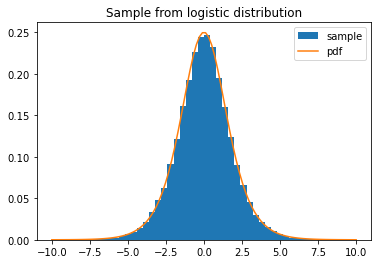

mu  ~ 0.005598834114380495
var ~ 3.2996652360198007


In [60]:
def p9():
    """Complete problem 9"""

    # Sample size
    p = 5
    n = 10**p

    # Sample n times from Uniform(0, 1)
    sample_U = uniform.rvs(0, 1, size=n)

    # Map sample through F^{-1} to get logistic sample
    sample = [np.log(u/(1-u)) for u in sample_U]
    
    # Plot bounds
    x1, x2 = -10, 10

    # Plot histogram of sample
    plt.hist(sample, bins=50, range=(x1, x2), density=True, label='sample')

    # Plot exponential distribution with scale=1/lam
    x = np.linspace(x1, x2, 100)
    y = logistic.pdf(x)
    plt.plot(x, y, label='pdf')

    # Plot
    plt.title(f'Sample from logistic distribution')
    plt.legend()
    plt.show()

    sample_mean = np.mean(sample)
    sample_variance = np.var(sample)

    print(f'mu  ~ {sample_mean}')
    print(f'var ~ {sample_variance}')

p9()

# Question 7.10

Code up a method for estimating the volume oof the unit ball in $d$-dimensional space using rejection sampling. Compute estimates for these values for $d\in \{1,\dots,10\}$ using enough samples to get a standard error less than $10^{-2}$.

In [112]:
def p10():
    """Complete problem 10"""

    # Sample size 10**p for each d
    P = (5, 6, 6, 6, 6, 6, 6, 6, 6, 6)

    def k(x):
        """Return 1 if vector x is inside unit sphere, 0 otherwise"""
        return 1 if np.linalg.norm(x) <= 1 else 0

    for d, p in zip(range(1, 11), P):
        # Sample size
        n = 10**p

        # Sample n times from Uniform(0, 1) x ... x Uniform(0, 1) in R^d
        # Each row of sample is one point in R^d
        sample = np.transpose([uniform.rvs(-1, 1, size=n) for _ in range(d)]) 

        # 2**d times E[k(x)]
        E = 2**d / n * np.sum([k(x) for x in sample])

        # Compute s_hat and approximate standard error
        s_hat = (sum([(k(x)-E)**2 for x in sample])/(n-1))**(1/2)
        SE = 2**d * s_hat / n**(1/2)

        print(f'd = {d:>2} | n = 10**{p:<2} | Area = {round(E, 5):<8} | SE ~ {SE}')

print('My computer takes too long to compute larger samples in order to minimize the SE.')
p10()

My computer takes too long to compute larger samples in order to minimize the SE.
d =  1 | n = 10**5  | Area = 2.0      | SE ~ 0.006324586943350532
d =  2 | n = 10**6  | Area = 3.14164  | SE ~ 0.00956691521038609
d =  3 | n = 10**6  | Area = 4.19023  | SE ~ 0.029602514328438793
d =  4 | n = 10**6  | Area = 4.93203  | SE ~ 0.0743485340886364
d =  5 | n = 10**6  | Area = 5.24957  | SE ~ 0.16316757771994106
d =  6 | n = 10**6  | Area = 5.16563  | SE ~ 0.32590158387481255
d =  7 | n = 10**6  | Area = 4.71936  | SE ~ 0.5998441804138737
d =  8 | n = 10**6  | Area = 4.03072  | SE ~ 1.028328052885978
d =  9 | n = 10**6  | Area = 3.2553   | SE ~ 1.6639548067511223
d = 10 | n = 10**6  | Area = 2.50368  | SE ~ 2.5617651373109016


# Question 7.11

Let $P$ be a distribution on $[0,\infty)$ with pdf equal to $f_{P} = \frac{1}{Z}e^{-x^2-x^3}$ for sampling with proposal distribution $Q \sim \text{Gamma}(1,1)$ to sample from this distribution as follows:

i) Find the smallest $m$ for which $e^{-x^2-x^3} \leq me^{-x}$

ii) Find the smallest $M$ (expressed in terms of $m$ and $Z$) for which $f_{P}\leq Mf_{Q}(x)$ for all $x\in [0, \infty)$. Show that the quanity $\frac{f_{P}(x)}{Mf_{Q}(x)}$ can be computed without knowing $Z$.

iii) Code up a rejection sampler that draws $z$ from Gamma(1,1) (using either a sample you wrote for Exercise 7.8 or another sampler), draws $u$ from Uniform([0,1]), and reject any $z$ such that the corresponding $u$ is greater than $\frac{f_{P}(z)}{Mf_{Q}(z)}$.

iv) Use your sampling method to draw $10^5$ times from $P$, and plot a normed histogram of the results, along with a plot of the pdf $f_{P}(x)$ (this last plot will require you to approximate $Z$).

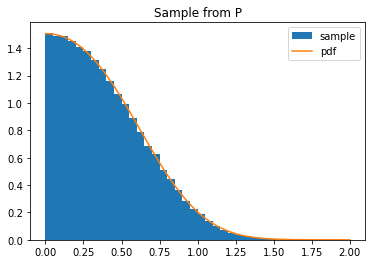

In [141]:
def p11():
    """Complete problem 11"""

    # Sample size 10**p
    p = 5
    n = 10**p

    # Bound such that e^(-x^2 - x^3) <= m e^(-x)
    m = np.exp(5/27)

    # Get n samples from P
    X = [None] * n
    for i in range(len(X)):
        # Sample x from Gamma(1, 1) and y from Unif(0, 1) until y <= fP(x)/(M fQ(x)) = e^(x-x^2-x^3)/m
        while X[i] is None:
            x = gamma.rvs(1)
            y = uniform.rvs(0, 1)
            if y <= np.exp(x - x**2 - x**3)/m:
                X[i] = x
    
    # Bounds on plot
    x1, x2 = 0, 2
    
    # Plot histogram of sample from P
    plt.hist(X, bins=40, range=(x1, x2), density=True, label='sample')

    # Z computed in Mathematica
    Z = 0.6637105705011184

    # Plot pdf of P
    x = np.linspace(x1, x2, 1000)
    y = np.exp(-x**2 - x**3)/Z
    plt.plot(x, y, label='pdf')

    # Plot
    plt.title('Sample from P')
    plt.legend()
    plt.show()

p11()